In [32]:
import numpy as np
import matplotlib.pyplot as plt

## Random x and y movements

In [60]:
num_steps = 500

In [61]:
xs = np.zeros(num_steps)
ys = np.zeros(num_steps)
movement_rate = 1

In [62]:
for i in range(1,num_steps,movement_rate):
    xs[i] = xs[i-movement_rate]+np.random.normal(0,1)
    ys[i] = ys[i-movement_rate]+np.random.normal(0.3,1)
for i in range(1,num_steps):
    if xs[i] == 0 and ys[i] == 0:
        xs[i] = (xs[i-1]+xs[i+1])/2
        ys[i] = (ys[i-1]+ys[i+1])/2

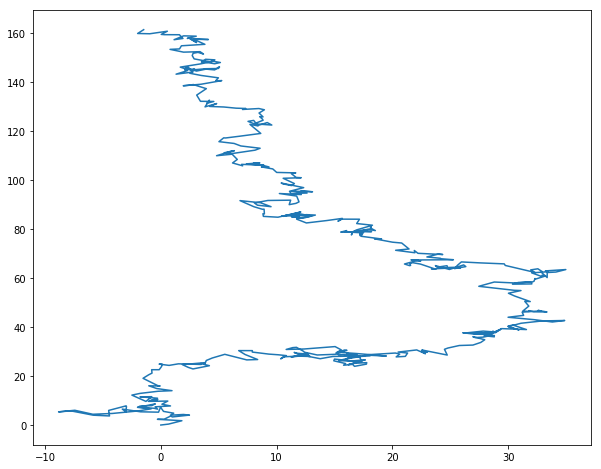

In [63]:
plt.plot(xs,ys)
plt.show()

In [64]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise (ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise( ValueError, "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise (ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [65]:
xs_smoothed = smooth(xs,window_len=7)
ys_smoothed = smooth(ys,window_len=7)

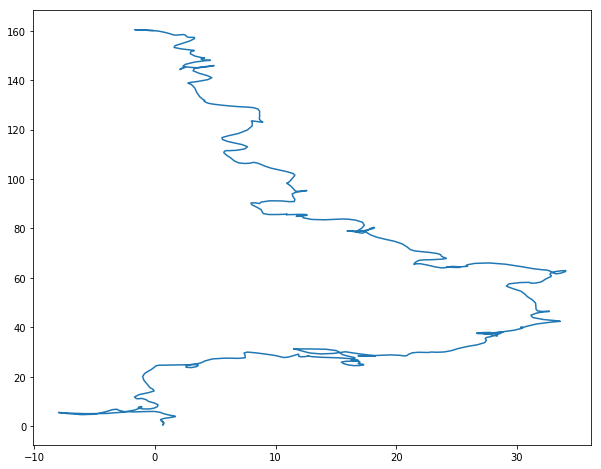

In [66]:
plt.plot(xs_smoothed,ys_smoothed)
plt.show()

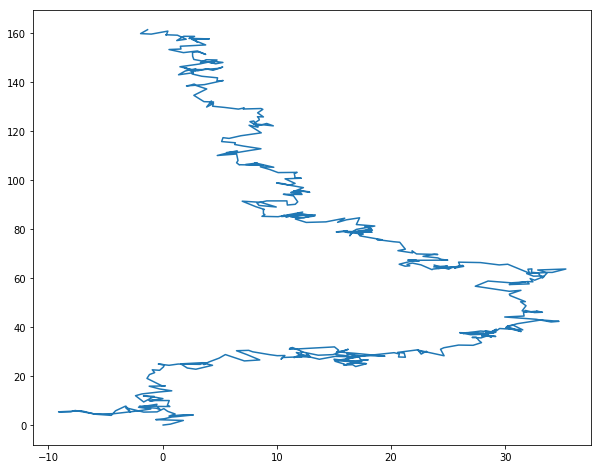

In [67]:
xs_base_st = xs.copy()
ys_base_st = ys.copy()
for i in range(num_steps):
    xs_base_st[i] += np.random.normal(0,0.2)
    ys_base_st[i] += np.random.normal(0,0.2)
plt.plot(xs_base_st,ys_base_st)

plt.show()

In [68]:
dt = 1
v_x = xs.copy()
v_y = ys.copy()
for i in range(1,num_steps-1):
    v_x[i] = (xs[i+1]-xs[i-1])/(2*dt)
    v_y[i] = (ys[i+1]-ys[i-1])/(2*dt)
v_x = v_x[1:-1]
v_y = v_y[1:-1]
num_steps -=2

In [69]:
acc_x = v_x.copy()
acc_y = v_y.copy()
for i in range(1,num_steps-1):
    acc_x[i] = (v_x[i+1]-v_x[i-1])/(2*dt)
    acc_y[i] = (v_y[i+1]-v_y[i-1])/(2*dt)
acc_x = acc_x[1:-1]
acc_y = acc_y[1:-1]
num_steps -=2

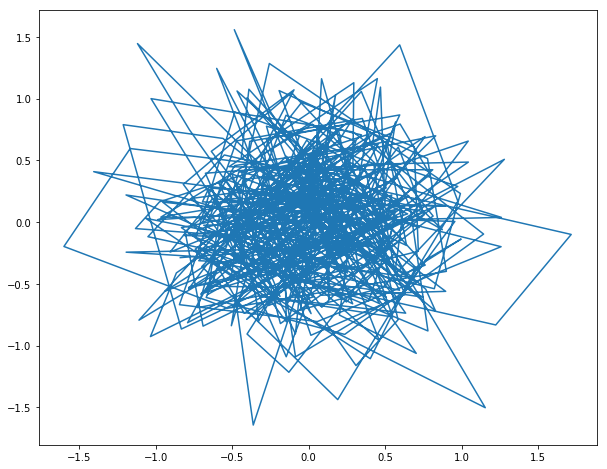

In [70]:
plt.plot(acc_x,acc_y)
plt.show()

# Bandpass Filter

We can remove anything with frequence higher than 10 \* (max frequency of the mouse) and less than 0.5 Hz for example.

/home/user/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


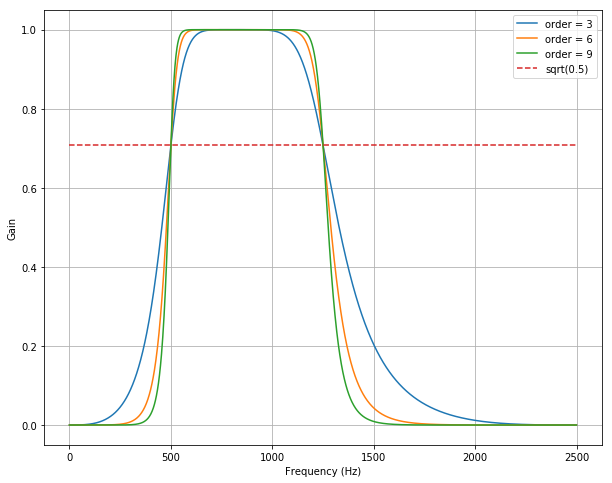

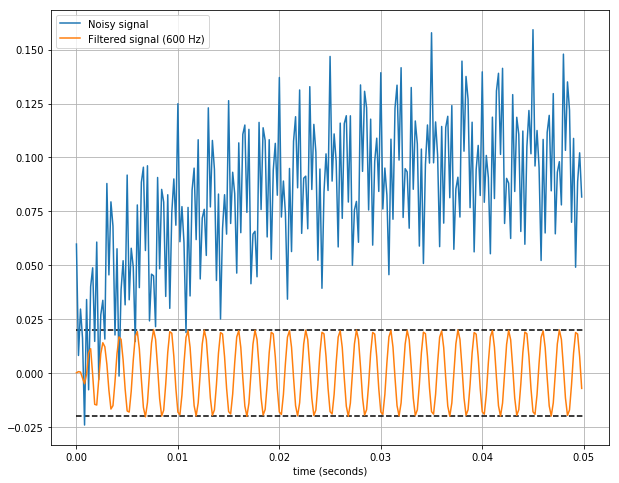

In [71]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = T * fs
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

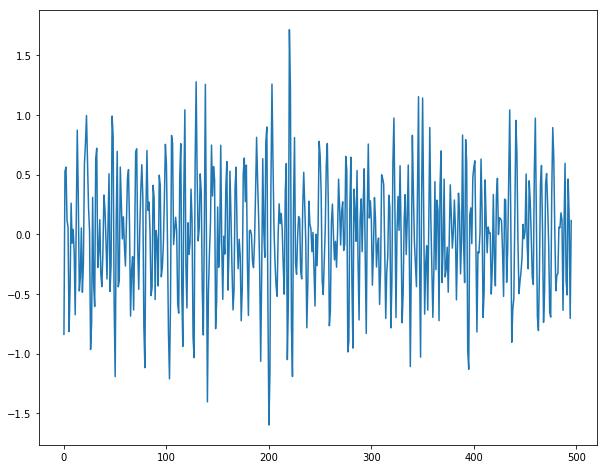

In [72]:
plt.plot(acc_x)
plt.show()

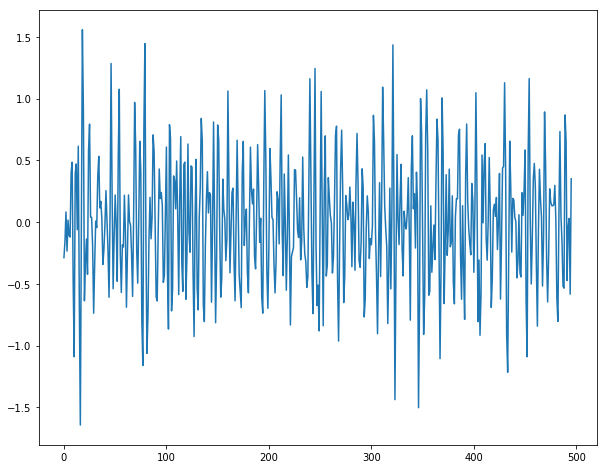

In [73]:
plt.plot(acc_y)
plt.show()

In [74]:
acc_clean_x = butter_bandpass_filter(acc_x, lowcut, highcut, fs, order=1)

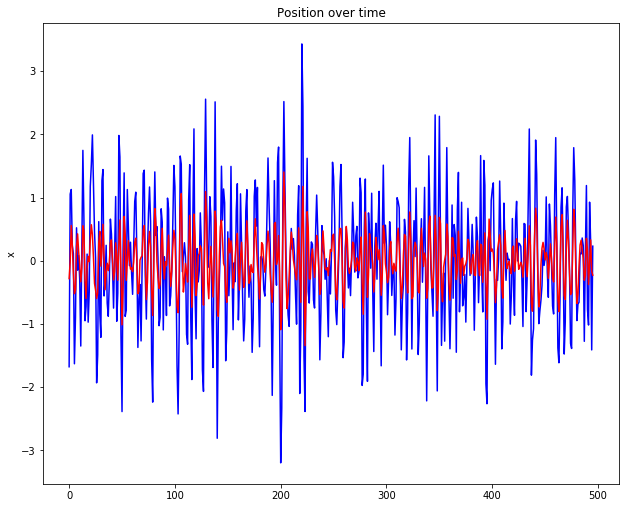

In [75]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(2*(acc_x), 'b')
axes.plot(acc_clean_x, 'r')

axes.set_ylabel('x')
axes.set_title('Position over time');


In [76]:
acc_clean_y = butter_bandpass_filter(acc_y, lowcut, highcut, fs, order=6)

## Simply integrate clean acc

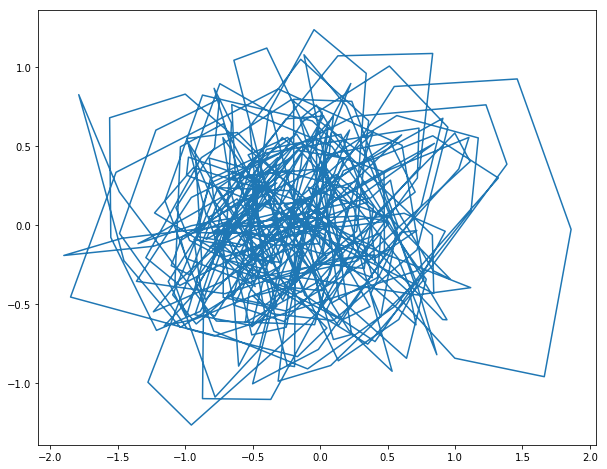

In [77]:
vel_x = acc_clean_x.copy()
vel_y = acc_clean_y.copy()

dt = 1
for i in range(1,num_steps):
    vel_x[i] = vel_x[i-1]+dt*acc_clean_x[i]
    vel_y[i] = vel_y[i-1]+dt*acc_clean_y[i]

pos_intgr_x = vel_x.copy()
pos_intgr_y = vel_y.copy()

for i in range(1,num_steps):
    pos_intgr_x[i] = pos_intgr_x[i-1]+dt*vel_x[i]
    pos_intgr_y[i] = pos_intgr_y[i-1]+dt*vel_y[i]

plt.plot(pos_intgr_x,pos_intgr_y)
plt.show()

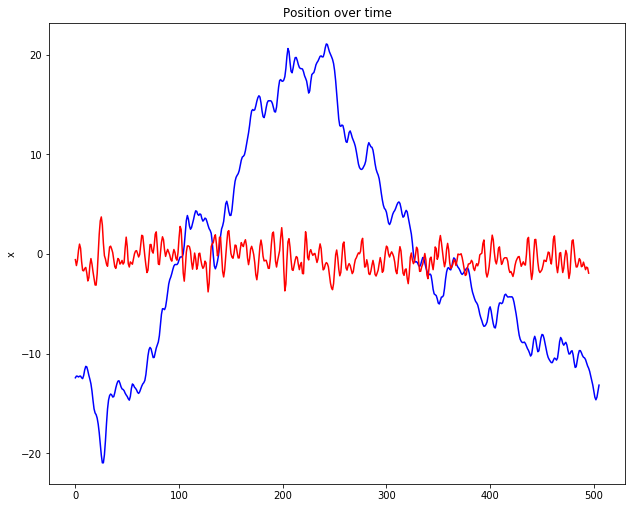

In [78]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot((xs_smoothed-xs_smoothed.mean()), 'b')
axes.plot(pos_intgr_x*2, 'r')

axes.set_ylabel('x')
axes.set_title('Position over time');


Nothing to do with the original.

## Simply integrate noisy acceleration

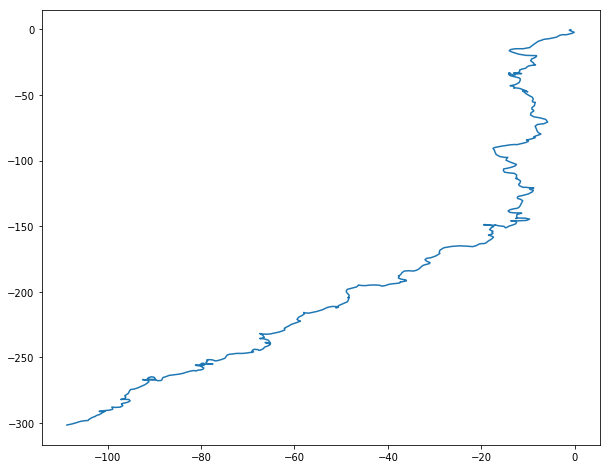

In [79]:
vel_x = acc_x.copy()
vel_y = acc_y.copy()

dt = 1
for i in range(1,num_steps):
    vel_x[i] = vel_x[i-1]+dt*acc_x[i]
    vel_y[i] = vel_y[i-1]+dt*acc_y[i]

pos_intgr_x = vel_x.copy()
pos_intgr_y = vel_y.copy()

for i in range(1,num_steps):
    pos_intgr_x[i] = pos_intgr_x[i-1]+dt*vel_x[i]
    pos_intgr_y[i] = pos_intgr_y[i-1]+dt*vel_y[i]

plt.plot(pos_intgr_x,pos_intgr_y)
plt.show()

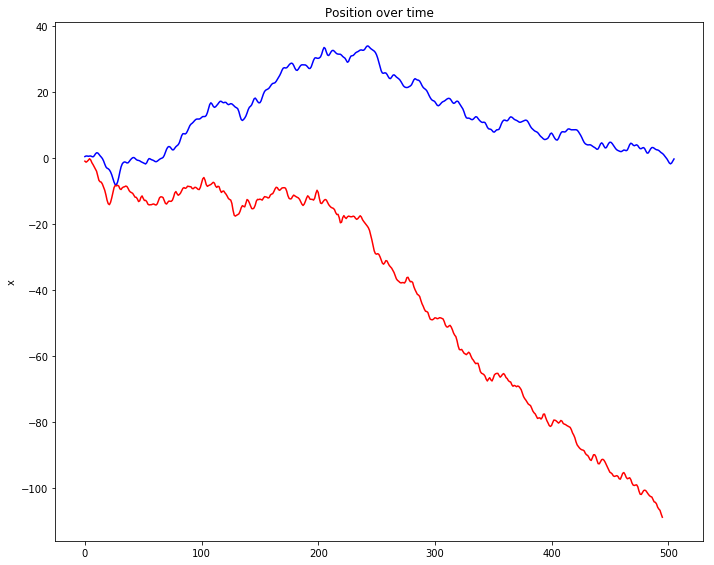

In [80]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.9, 0.9]) 

axes.plot(xs_smoothed, 'b')
axes.plot(pos_intgr_x, 'r')

axes.set_ylabel('x')
axes.set_title('Position over time');


Cool

___

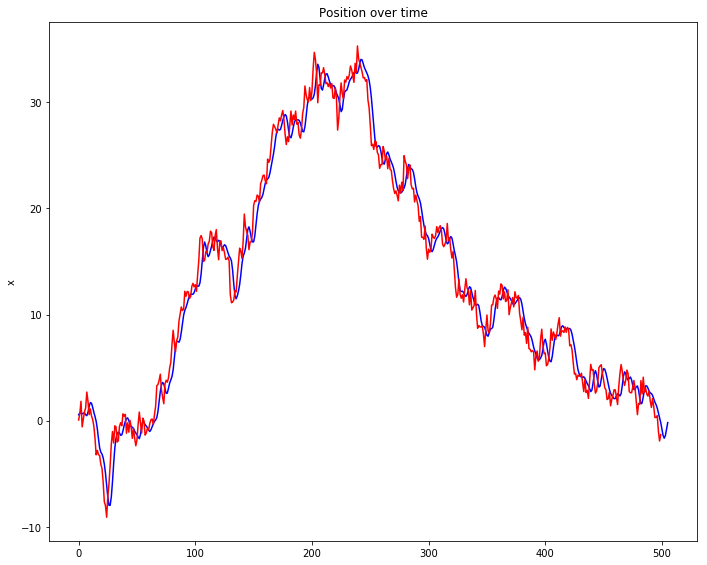

In [81]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.9, 0.9]) 

axes.plot(xs_smoothed, 'b')
axes.plot(xs_base_st, 'r')

axes.set_ylabel('x')
axes.set_title('Position over time');


In [82]:
xs_base_st = xs_base_st[:-4]
len(xs_base_st)

496

In [83]:
sensor_vectors = np.stack((pos_intgr_x,xs_base_st))
sensor_vectors = sensor_vectors.T
sensor_vectors.shape

(496, 2)

In [84]:
C = np.stack 

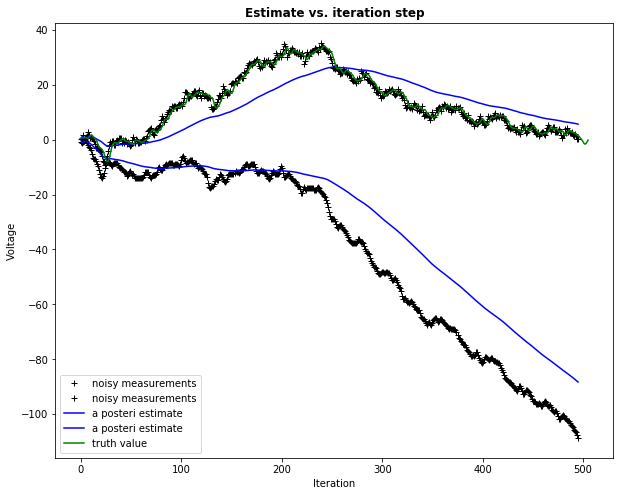

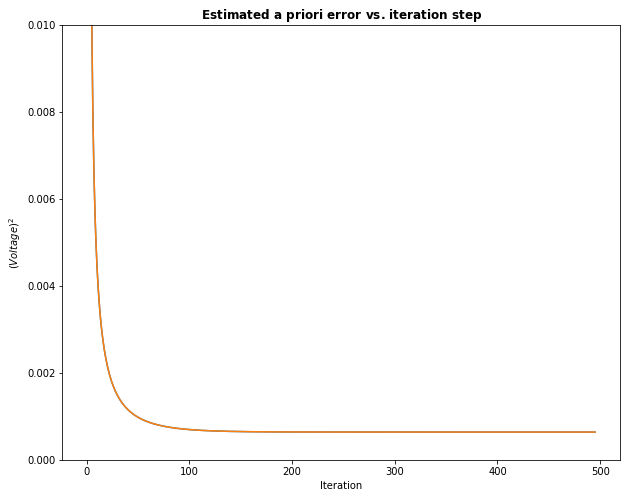

In [85]:
# Kalman filter example demo in Python

# A Python implementation of the example given in pages 11-15 of "An
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# University of North Carolina at Chapel Hill, Department of Computer
# Science, TR 95-041,
# http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 496
sz = (n_iter,2) # size of array
x = xs_smoothed # truth value
z = sensor_vectors # observations 

Q = 1e-5 # process variance


# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.2**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.plot(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()

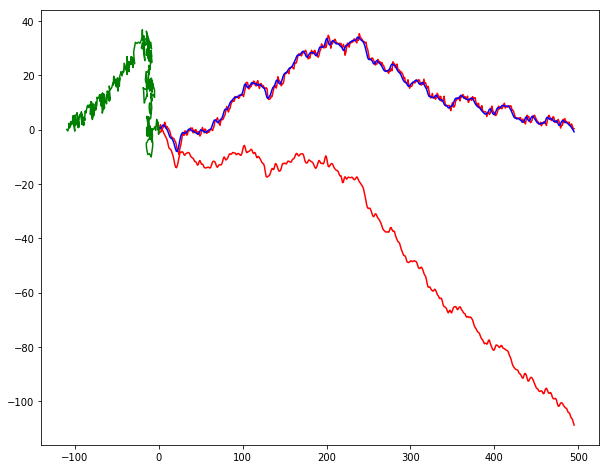

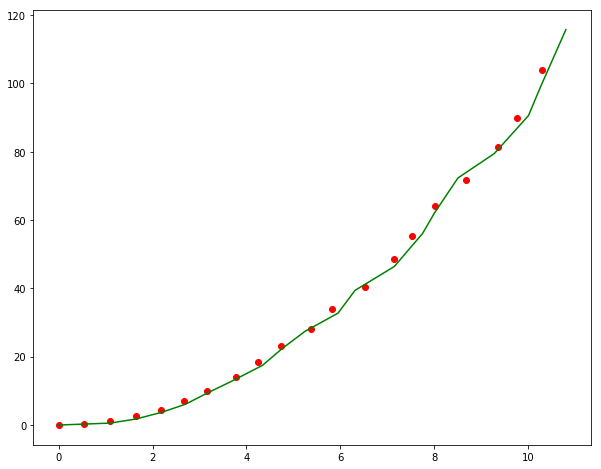

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def kalman_xy(x, P, measurement, R,
              motion = np.matrix('0. 0. 0. 0.').T,
              Q = np.matrix(np.eye(4))):
    """
    Parameters:    
    x: initial state 4-tuple of location and velocity: (x0, x1, x0_dot, x1_dot)
    P: initial uncertainty convariance matrix
    measurement: observed position
    R: measurement noise 
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    """
    return kalman(x, P, measurement, R, motion, Q,
                  F = np.matrix('''
                      1. 0. 1. 0.;
                      0. 1. 0. 1.;
                      0. 0. 1. 0.;
                      0. 0. 0. 1.
                      '''),
                  H = np.matrix('''
                      1. 0. 0. 0.;
                      0. 1. 0. 0.'''))

def kalman(x, P, measurement, R, motion, Q, F, H):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    measurement: observed position (same shape as H*x)
    R: measurement noise (same shape as H)
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    F: next state function: x_prime = F*x
    H: measurement function: position = H*x

    Return: the updated and predicted new values for (x, P)

    See also http://en.wikipedia.org/wiki/Kalman_filter

    This version of kalman can be applied to many different situations by
    appropriately defining F and H 
    '''
    # UPDATE x, P based on measurement m    
    # distance between measured and current position-belief
    y = np.matrix(measurement).T - H * x
    S = H * P * H.T + R  # residual convariance
    K = P * H.T * S.I    # Kalman gain
    x = x + K*y
    I = np.matrix(np.eye(F.shape[0])) # identity matrix
    P = (I - K*H)*P

    # PREDICT x, P based on motion
    x = F*x + motion
    P = F*P*F.T + Q

    return x, P


def kalman_sensors_x():
    x = np.matrix('0. 0. 0. 0.').T 
    P = np.matrix(np.eye(4))*1000 # initial uncertainty
    true_x = xs_smoothed
    observed_x = sensor_vectors
    plt.plot(observed_x, 'r')
    plt.plot(xs_smoothed[5:-5],'b')
    result = []
    R = 0.01**2
    for measurment in zip(observed_x.T[0], observed_x.T[1]):
        x, P = kalman_xy(x, P, measurment, R)
        result.append((x[:2]).tolist())
    kalman_x, kalman_y = zip(*result)
    plt.plot(kalman_x, kalman_y, 'g')
    plt.show()


def demo_kalman_xy():
    x = np.matrix('0. 0. 0. 0.').T 
    P = np.matrix(np.eye(4))*1000 # initial uncertainty

    N = 20
    true_x = np.linspace(0.0, 10.0, N)
    true_y = true_x**2
    observed_x = true_x + 0.05*np.random.random(N)*true_x
    observed_y = true_y + 0.05*np.random.random(N)*true_y
    plt.plot(observed_x, observed_y, 'ro')
    result = []
    R = 0.01**2
    for meas in zip(observed_x, observed_y):
        x, P = kalman_xy(x, P, meas, R)
        result.append((x[:2]).tolist())
    kalman_x, kalman_y = zip(*result)
    plt.plot(kalman_x, kalman_y, 'g-')
    plt.show()

kalman_sensors_x()
demo_kalman_xy()